In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from warnings import simplefilter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer
simplefilter(action='ignore', category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train=pd.read_csv('/content/drive/My Drive/label_encoding/X_train_onehotencoding1.csv')
y_train=pd.read_csv('/content/drive/My Drive/label_encoding/y_train_onehotencoding1.csv')
#X_test=pd.read_csv('/content/drive/My Drive/label_encoding/X_test1.csv')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   AVProductStatesIdentifier_53447.0                200000 non-null  int64  
 1   AVProductStatesIdentifier_7945.0                 200000 non-null  int64  
 2   AppVersion                                       200000 non-null  int64  
 3   Census_IsAlwaysOnAlwaysConnectedCapable          200000 non-null  float64
 4   Census_IsVirtualDevice                           200000 non-null  float64
 5   Census_MDC2FormFactor_tablet                     200000 non-null  int64  
 6   Census_OSArchitecture_x86                        200000 non-null  int64  
 7   Census_OSVersion                                 200000 non-null  int64  
 8   Census_TotalPhysicalRAM                          200000 non-null  float64
 9   EngineVersion  

In [ ]:
y_train=y_train['HasDetections']

In [ ]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: HasDetections, dtype: int64

## split Train Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# **Random Forest**

In [ ]:
# Defining the range for which we will test our hyper parameters 
max_depth = np.arange(10,150,10)
min_samples_leaf=np.arange(10,100,10)
n_estimators = np.arange(10,100,10)
param_grid = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'n_estimators':n_estimators}

The range is large and this might take a lot of time to test out hyperparameters. So we will try to reduce the search space for the hyperparameters by individually conducting a validation testing and picking up a range for which we see the least error. This will narrow our search space

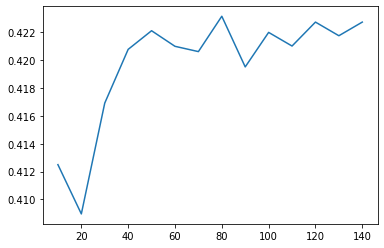

In [ ]:
e=[]
for depth in max_depth:
    forest = RandomForestClassifier(max_depth=depth)
    forest.fit(X_train,y_train)
    yhat=forest.predict(X_test)
    e.append(np.mean(yhat!=y_test))
plt.plot(max_depth,e)

From the plot above it is safe to assume that the least error is obtained for a max_depth between 10 and 30

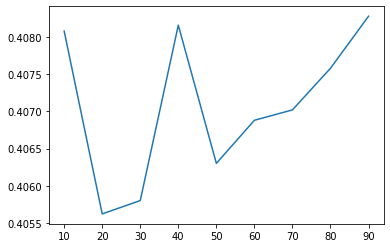

In [ ]:
e=[]
for leaf in min_samples_leaf:
    forest = RandomForestClassifier(min_samples_leaf=leaf)
    forest.fit(X_train,y_train)
    yhat=forest.predict(X_test)
    e.append(np.mean(yhat!=y_test))
plt.plot(min_samples_leaf,e)

From the plot above it is safe to assume that the least error is obtained for a min_samples between 25 and 35

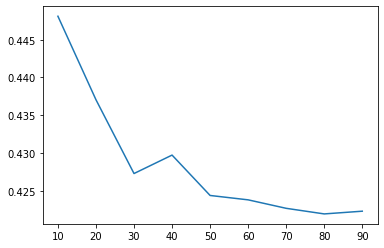

In [ ]:
e=[]
for est in n_estimators:
    forest = RandomForestClassifier(n_estimators=est)
    forest.fit(X_train,y_train)
    yhat=forest.predict(X_test)
    e.append(np.mean(yhat!=y_test))
plt.plot(n_estimators,e)

From the plot above it is safe to assume that the least error is obtained for a n_estimators between 60 and 80

In [ ]:
redifining hyperparameters
max_depth = np.array([10,20,20])
min_samples_leaf=np.array([10,20,30])
n_estimators = np.array([70,80,90])
param_grid = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'n_estimators':n_estimators}

### Conducting hyper parameter tuning and validation testing with K-Fold method using GridSearchCV

In [ ]:
forest = RandomForestClassifier()
cvf = RandomizedSearchCV(forest,param_grid,return_train_score=True,refit=True,cv=5,scoring = 'roc_auc')

In [ ]:
cvf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
depth=cvf.best_params_['max_depth']
leaves = cvf.best_params_['min_samples_leaf']
est=cvf.best_params_['n_estimators']

In [ ]:
forest = RandomForestClassifier(max_depth=depth,min_samples_leaf=leaves,n_estimators=est)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=forest.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n',cm)
print('\nClassification report: \n',classification_report(y_test, y_pred))

confusion matrix: 
 [[16328  8778]
 [ 9763 15131]]

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.65      0.64     25106
           1       0.63      0.61      0.62     24894

    accuracy                           0.63     50000
   macro avg       0.63      0.63      0.63     50000
weighted avg       0.63      0.63      0.63     50000



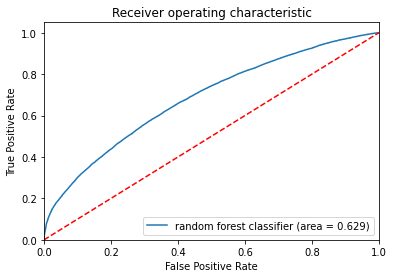

In [ ]:
forest_roc_auc = roc_auc_score(y_test, forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='random forest classifier (area = %0.3f)' % forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Test error is " + str(np.mean(y_pred!=y_test)))

Test error is 0.37082


# LightGBM classifier

In [ ]:
import lightgbm as lgb

In [ ]:
# Defining training hyper parameter
fit_params={ 
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

Reducing the Hyper parameter search space as performed in Random forest

In [ ]:
num_leaves=np.arange(100,1001,100)
learning_rate=np.array([0.001,0.005,0.01,0.05])
colsample_bytree=np.array([0.01,0.5,0.10,0.15])
min_child_samples=np.array([50,27,100,125,150,175])
num_leaves=np.array([50,75,100,125,150,175])
reg_alpha=np.arange(0,1,0.1)
reg_lambda=np.arange(0,1,0.1)
param_grid={'num_leaves':num_leaves,
            'learning_rate':learning_rate,
            'colsample_bytree':colsample_bytree,
            'min_child_samples':min_child_samples,
            'num_leaves':num_leaves,
            'reg_alpha':reg_alpha,
            'reg_lambda':reg_lambda,
            }


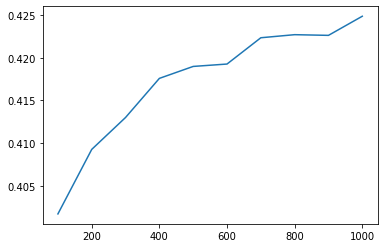

In [ ]:
e=[]
for leaf in num_leaves:
    clf = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=2000,num_leaves=leaf)   
    clf.fit(X_train,y_train,**fit_params)
    yhat=clf.predict(X_test)
    e.append(np.mean(yhat!=y_test))
plt.plot(num_leaves,e)

From the plot above it is safe to assume that the least error is obtained for a n_estimators are between 0 and 200

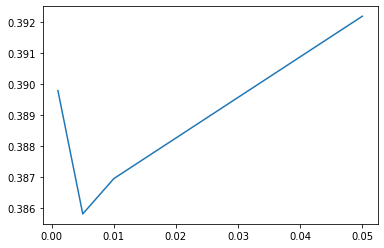

In [ ]:
e=[]
for rate in learning_rate:
    clf = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=2000,learning_rate=rate)   
    clf.fit(X_train,y_train,**fit_params)
    yhat=clf.predict(X_test)
    e.append(np.mean(yhat!=y_test))
plt.plot(learning_rate,e)

From the plot above it is safe to assume that the least error is obtained for a n_estimators are between 0.005 and 0.015

In [ ]:
from sklearn.metrics import roc_auc_score
clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                                 n_estimators=2000)
#roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)
cvf = RandomizedSearchCV(clf,param_grid,return_train_score=True,refit=True,cv=5,scoring = make_scorer(roc_auc_score, greater_is_better=True))

In [ ]:
cvf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=2000, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sil...
                                        'learning_rate': array([0.001, 0.005, 0.01 , 0.05 ]),
                               

In [ ]:
best_num_leaves=cvf.best_params_['num_leaves']
best_learning_rate=cvf.best_params_['learning_rate']
best_colsample_bytree=cvf.best_params_['colsample_bytree']
best_min_child_samples=cvf.best_params_['min_child_samples']
best_num_leaves=cvf.best_params_['num_leaves']
best_reg_alpha=cvf.best_params_['reg_alpha']
best_reg_lambda=cvf.best_params_['reg_lambda']

In [ ]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                         n_estimators=2000,
                         num_leaves=best_num_leaves,
                         learning_rate=best_learning_rate,
                         colsample_bytree=best_colsample_bytree,
                         min_child_samples=best_min_child_samples,
                         reg_alpha=best_reg_alpha,
                         reg_lambda=best_reg_lambda
                         )
clf.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.001, max_depth=-1,
               min_child_samples=125, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=125,
               objective=None, random_state=None, reg_alpha=0.30000000000000004,
               reg_lambda=0.6000000000000001, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n',cm)
print('\nClassification report: \n',classification_report(y_test, y_pred))

confusion matrix: 
 [[15709  9397]
 [ 9068 15826]]

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.63      0.63     25106
           1       0.63      0.64      0.63     24894

    accuracy                           0.63     50000
   macro avg       0.63      0.63      0.63     50000
weighted avg       0.63      0.63      0.63     50000



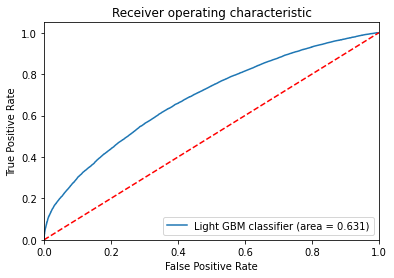

In [ ]:
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Light GBM classifier (area = %0.3f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Test error is " + str(np.mean(y_pred!=y_test)))

Test error is 0.3693


# XGBoost classifier

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
# define hyperparameters
min_child_weight=np.arange(1,11,1)
max_depth=np.arange(1,11,1)
gamma=np.arange(0,6,0.5)
subsample=np.arange(0,1,0.2)
colsample_bytree=np.arange(0,1.2,0.2)
reg_alpha=np.array([0.01,0.05 ,0.1, 0.15,0.2,0.25,0.3,0.35,0.4])
learning_rate=np.array([0.01,0.05,0.1,0.15,0.2,0.25,0.3])

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

param_grid={'min_child_weight':min_child_weight,
            'max_depth':max_depth,
            'gamma':gamma,
            'subsample':subsample,
            'colsample_bytree':colsample_bytree,
            'reg_alpha':reg_alpha,
            'learning_rate':learning_rate
            }


In [ ]:
xgb=XGBClassifier(n_estimators=1000,objective='binary:logistic')
xgb_cv = RandomizedSearchCV(xgb,param_grid,return_train_score=True,refit=True,cv=5,scoring = make_scorer(roc_auc_score, greater_is_better=True))

In [ ]:
xgb_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=1000,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'learning_rate': array([0.01, 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
                                        'max_depth': array([ 1,  2,  

In [ ]:
best_min_child_weight=xgb_cv.best_params_['min_child_weight']
best_max_depth=xgb_cv.best_params_['max_depth']
best_gamma=xgb_cv.best_params_['gamma']
best_subsample=xgb_cv.best_params_['subsample']
best_colsample_bytree=xgb_cv.best_params_['colsample_bytree']
best_reg_alpha=xgb_cv.best_params_['reg_alpha']
best_learning_rate=xgb_cv.best_params_['learning_rate']

In [ ]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'gamma': 4.5,
 'learning_rate': 0.05,
 'max_depth': 9,
 'min_child_weight': 3,
 'reg_alpha': 0.01,
 'subsample': 0.2}

In [ ]:
xgb=XGBClassifier(n_estimators=1000,
                  objective='binary:logistic',
                  min_child_weight=best_min_child_weight,
                  max_depth=best_max_depth,
                  gamma=best_gamma,
                  subsample=best_subsample,
                  colsample_bytree=best_colsample_bytree,
                  reg_alpha=best_reg_alpha,
                  learning_rate=best_learning_rate)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=4.5,
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)

In [ ]:
y_pred=xgb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n',cm)
print('\nClassification report: \n',classification_report(y_test, y_pred))

confusion matrix: 
 [[16290  8816]
 [ 9653 15241]]

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.65      0.64     25106
           1       0.63      0.61      0.62     24894

    accuracy                           0.63     50000
   macro avg       0.63      0.63      0.63     50000
weighted avg       0.63      0.63      0.63     50000



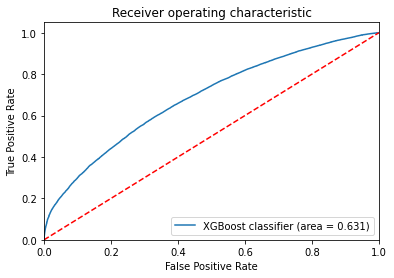

In [ ]:
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='XGBoost classifier (area = %0.3f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Test error is " + str(np.mean(y_pred!=y_test)))

Test error is 0.36938


# Results

In [ ]:
columns=['Classifier','Test Error(%)','AUC Score']
results = pd.DataFrame(columns=columns)
results['Classifier'] = np.array(['Random Forest','LGB classifier','XGBoost Classifier'])
results['Test Error(%)'] = np.array([37.08,36.95,36.94])
results['AUC Score'] = np.array([0.629,0.631,0.631])
results

,Classifier,Test Error(%),AUC Score
0,Random Forest,37.08,0.629
1,LGB classifier,36.95,0.631
2,XGBoost Classifier,36.94,0.631


# feature importance

     |████████████████████████████████| 327kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456457 sha256=988c5c42b1874544eb8e0809031c7045a4bb3aba53821d9a0293b556609c3f6c
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


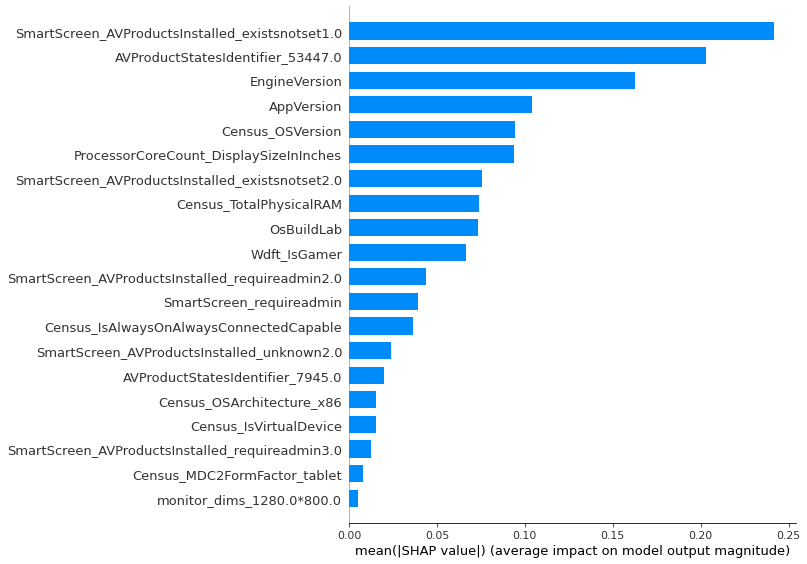

In [ ]:
!pip install shap
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

top three varibles the model is depedent mostly are smartscreen_AVProdctsInstalled_existsnotset1.0, AVProductStatesIdentifier_53477.0, Enginer version

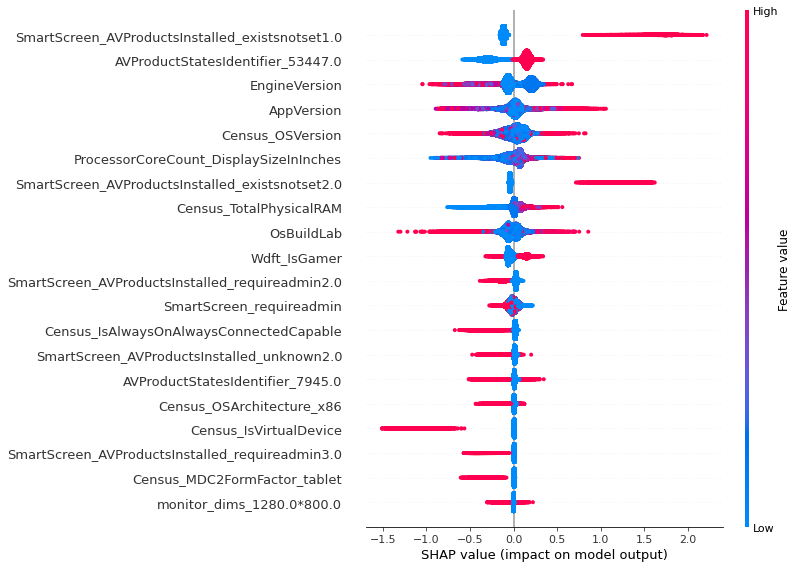

In [ ]:

import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

- smartscreen_AVProdctsInstalled_existsnotset1.0 is positively correlated to target variable
- AVProductStatesIdentifier_53477.0 is negativley coorelated to target variable
- EngineVersion is negatively correlated to target variable
